In [2]:
# Import pandas as pd
import pandas as pd

In [3]:
fpath_csv = "F:\\schulich\\datacamp\\applied finance\\1-Introduction to Portfolio Risk Management in Python\\StockPrices.xlsx"
# Read in the excelfile and parse dates
StockPrices = pd.read_excel(fpath_csv, parse_dates = ['Date'])
StockPrices.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [4]:
# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

In [5]:
# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
StockPrices.head()

,Date,Open,High,Low,Close,Volume,Adjusted,Returns
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


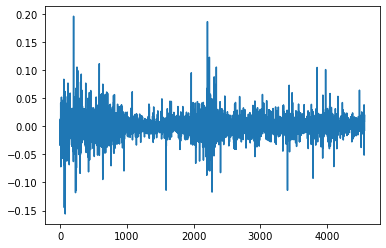

In [6]:
import matplotlib.pyplot as plt
# Plot the returns column over time
StockPrices['Returns'].plot()
plt.show()

In [6]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values : you remember the first row's value in NaN as the first return can not be calculated. 
# lets drop it
returns_plot = percent_return.dropna()
returns_plot

1      -3.377986
2       1.054377
3      -3.349818
4       1.306813
5       0.729077
          ...   
4556    1.077340
4557    0.785375
4558    1.565814
4559    2.037227
4560   -0.712286
Name: Returns, Length: 4560, dtype: float64

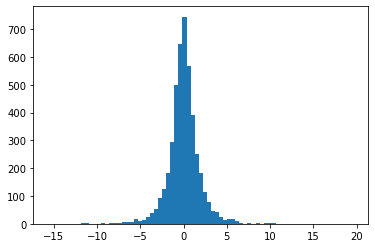

In [7]:
# Plot the returns histogram
plt.hist(returns_plot, bins = 75, density=False) # denisty = false gives you the frequency,and True gives the probability
plt.show()

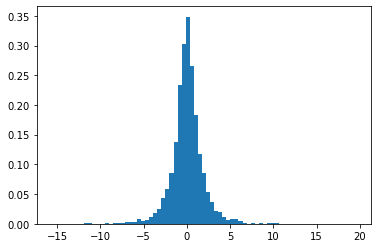

In [8]:
plt.hist(returns_plot, bins = 75, density=True) 
plt.show()

In [9]:
# Import numpy as np
import numpy as np

# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print(mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.0003777754643575769
0.09985839482852632


In [10]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print(sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print(variance_daily)

0.019341100408708328
0.0003740781650197374


In [11]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*(np.sqrt(252))
print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.3070304505826317
0.09426769758497383


In [12]:
# Skewness and Kurtosis
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.21935459193067805


In [13]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns) # kurtosis function gives the amount above 3 which is for normal distribution
print('Excess Kurtosis =', excess_kurtosis)

# Derive the true fourth moment of the returns distribution
Real_Kurtosis = excess_kurtosis + 3
print('Real Kurtosis =', Real_Kurtosis)

Excess Kurtosis = 10.314572618025519
Real Kurtosis = 13.314572618025519


In [14]:
# Statistical tests for normality
# In order to truly be confident in your judgement of the normality of the stock's return distribution, you will want 
# to use a true statistical test rather than simply examining the kurtosis or skewness.
# You can use the shapiro() function from scipy.stats to run a Shapiro-Wilk test of normality on the stock returns.
# The function will return two values in a list. The first value is the t-stat of the test, and the second value is
# the p-value. You can use the p-value to make a judgement about the normality of the data. If the p-value is less 
# than or equal to 0.05, you can safely reject the null hypothesis of normality and assume that the data are non-normally
# distributed. you need to use this test when skewness is close to zero and kurtosis is close to 3, making the judgmemt
# difficult to say if it is normal or not.
# Import shapiro from scipy.stats

from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: ShapiroResult(statistic=0.9003633260726929, pvalue=0.0)
P-value:  0.0


In [15]:
# The null hypothesis of the Shapiro-Wilk test is that the data are normally distributed
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected.


In [16]:
# calculating portfolio returns and std given the weights
fpath_csv = "F:\\schulich\\datacamp\\applied finance\\1-Introduction to Portfolio Risk Management in Python\\StockReturns.xlsx"
# Read in the excelfile and parse dates
StockReturns = pd.read_excel(fpath_csv, parse_dates = ['Date'], index_col='Date')
StockReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [17]:
# Finish defining the portfolio weights as a numpy array : 
# weights are given as below
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)
WeightedReturns

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.000342,0.001062,0.000558,0.000273,0.000980,0.000507,0.000313,0.002202,0.001843
2017-01-04,-0.000134,-0.000671,-0.000880,-0.000082,0.000166,0.000466,0.000035,0.002192,-0.000930
2017-01-05,0.000610,0.000000,-0.001193,0.000523,-0.000828,0.003073,-0.000625,0.002335,-0.000449
2017-01-06,0.001338,0.001300,-0.000045,-0.000240,0.000010,0.001991,0.000314,0.003179,-0.003188
2017-01-09,0.001099,-0.000477,-0.001320,-0.000009,0.000063,0.000117,-0.000522,0.001690,-0.002014
...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000018,0.000114,-0.000333,-0.000317,-0.000545,0.000189,-0.000197,0.000247
2017-12-26,-0.003044,-0.000193,0.000010,-0.000011,-0.000360,0.000719,0.000316,-0.000956,0.000493
2017-12-27,0.000021,0.000544,-0.000076,0.000171,0.000168,0.000467,-0.000316,0.001297,-0.000696


In [18]:
# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)
StockReturns['Portfolio']

Date
2017-01-03    0.008082
2017-01-04    0.000162
2017-01-05    0.003447
2017-01-06    0.004660
2017-01-09   -0.001372
                ...   
2017-12-22   -0.000825
2017-12-26   -0.003026
2017-12-27    0.001581
2017-12-28    0.002572
2017-12-29   -0.006189
Name: Portfolio, Length: 251, dtype: float64

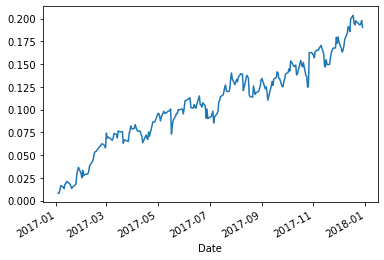

In [19]:
# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [20]:
# Equally weighted portfolios in Python
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
portfolio_weights_ew

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [21]:
# Calculate the equally-weighted portfolio returns
# this time we need to use iloc because we have 9 stock and one extra column called Portfolio which we dont want to include.
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:9].mul(portfolio_weights_ew, axis=1).sum(axis=1)
StockReturns

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio,Portfolio_EW
Date,,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.008082,0.007605
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000162,-0.000174
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003447,0.003374
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.004660,0.004458
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.001372,-0.001565
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543,-0.000825,-0.001360
2017-12-26,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082,-0.003026,-0.002715
2017-12-27,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352,0.001581,0.001651


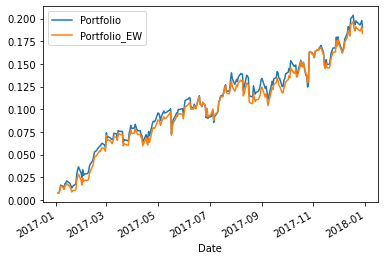

In [22]:
CumulativeReturns_EW = ((1+StockReturns["Portfolio_EW"]).cumprod()-1)
CumulativeReturns.plot()
CumulativeReturns_EW.plot()
plt.legend()
plt.show()


In [23]:
# as we are supposed to plot the cumulative return several times, we can define a function to avoid repeating every time
# Define the cumulative income curve drawing function
def cumulative_returns_plot(name_list):
    for name in name_list:
        CumulativeReturns = ((1+StockReturns[name]).cumprod()-1)
        CumulativeReturns.plot(label=name)
    plt.legend()
    plt.show()

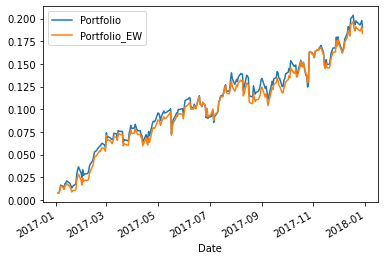

In [24]:
# You just need to set the list of returns as the input. 
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

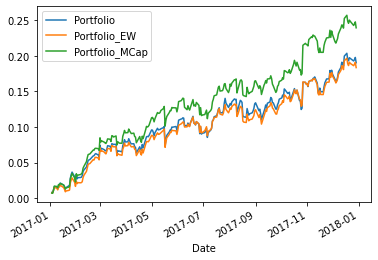

In [25]:
# Market-cap weighted portfolios
# Conversely, when large companies are doing well, market capitalization, or "market cap" weighted portfolios
# tend to outperform. This is because the largest weights are being assigned to the largest companies, or the
# companies with the largest market cap
# assume the below is the market cap of our 9 companies

# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations / market_capitalizations.sum()

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

In [26]:
# Calculate the correlation matrix
correlation_matrix = StockReturns.iloc[:,0:9].corr()

# Print the correlation matrix
print(correlation_matrix)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  1.000000  0.437430  0.055501  0.038429  0.199914  0.509472  0.006764   
MSFT  0.437430  1.000000  0.084105  0.230209  0.191246  0.621096 -0.044827   
XOM   0.055501  0.084105  1.000000  0.121016  0.305924  0.015112  0.193863   
JNJ   0.038429  0.230209  0.121016  1.000000  0.070324  0.052782  0.067931   
JPM   0.199914  0.191246  0.305924  0.070324  1.000000  0.013921  0.257399   
AMZN  0.509472  0.621096  0.015112  0.052782  0.013921  1.000000 -0.092191   
GE    0.006764 -0.044827  0.193863  0.067931  0.257399 -0.092191  1.000000   
FB    0.542367  0.543343 -0.046816  0.079390  0.095246  0.653031 -0.024365   
T     0.005081 -0.021081  0.197572  0.091621  0.252831 -0.017914  0.292705   

            FB         T  
AAPL  0.542367  0.005081  
MSFT  0.543343 -0.021081  
XOM  -0.046816  0.197572  
JNJ   0.079390  0.091621  
JPM   0.095246  0.252831  
AMZN  0.653031 -0.017914  
GE   -0.024365  0.292705  
FB 

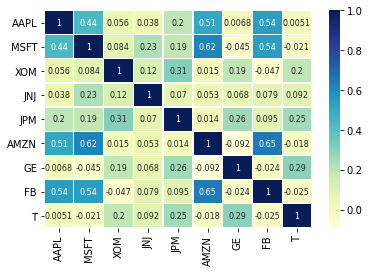

In [27]:
# Import seaborn as sns
import seaborn as sns

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [28]:
# Calculate the covariance matrix
cov_mat = StockReturns.iloc[:,0:9].cov()
cov_mat

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,1.230005e-04,0.000045,0.000004,0.000003,0.000023,0.000075,9.364356e-07,0.000064,6.027884e-07
MSFT,4.523800e-05,0.000087,0.000006,0.000015,0.000018,0.000076,-5.218094e-06,0.000054,-2.102735e-06
XOM,4.335247e-06,0.000006,0.000050,0.000006,0.000022,0.000001,1.704445e-05,-0.000004,1.488437e-05
JNJ,3.072043e-06,0.000015,0.000006,0.000052,0.000005,0.000005,6.112315e-06,0.000006,7.064001e-06
JPM,2.268092e-05,0.000018,0.000022,0.000005,0.000105,0.000002,3.286982e-05,0.000010,2.766547e-05
AMZN,7.462339e-05,0.000076,0.000001,0.000005,0.000002,0.000174,-1.519913e-05,0.000092,-2.530658e-06
GE,9.364356e-07,-0.000005,0.000017,0.000006,0.000033,-0.000015,1.558313e-04,-0.000003,3.908419e-05
FB,6.445749e-05,0.000054,-0.000004,0.000006,0.000010,0.000092,-3.259292e-06,0.000115,-2.809048e-06
T,6.027884e-07,-0.000002,0.000015,0.000007,0.000028,-0.000003,3.908419e-05,-0.000003,1.144164e-04


In [29]:
# Annualize the co-variance matrix (similar to annual variance = daily variance * 252)
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
cov_mat_annual

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001092,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001092,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013093,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039269,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833


In [30]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08931408480355715


In [31]:
# Asset pricing : CAPM and Fama French Model
# first get the Fama and French data, we will start with CAPM. 
# the portfolio return is 
FamaFrenchData_path = "F:\\schulich\\datacamp\\applied finance\\1-Introduction to Portfolio Risk Management in Python\\FamaFrenchData.xlsx"
# Read in the excelfile and parse dates
FamaFrenchData = pd.read_excel(FamaFrenchData_path, parse_dates = ['Date'], index_col='Date')
FamaFrenchData.head()

,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.000025
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.000025
2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.000025
2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.000025
2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.000025


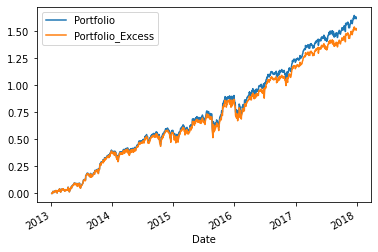

In [32]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF'] 

# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [39]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()
covariance_matrix

,Portfolio_Excess,Market_Excess
Portfolio_Excess,0.000070,0.000057
Market_Excess,0.000057,0.000059


In [40]:
# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
covariance_coefficient

5.7261264320223525e-05

In [41]:
# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
benchmark_variance

5.8803350882118946e-05

In [42]:
# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient/benchmark_variance
portfolio_beta

0.9737755325374775

In [45]:
# we can also use regression to calculate beta and see how reliable our estimate of beta is

# Import statsmodels.formula.api
import statsmodels.formula.api as smf

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)
CAPM_fit = CAPM_model.fit()

# Extract the beta and compare it with the beta calulcated above, the must be the same. 
regression_beta = CAPM_fit.params['Market_Excess']
regression_beta

0.9737755325374778

In [48]:
# the R-squared value of a regressiob is a measure of the percent of variance of the regressed variable explained by
# the regressor factors, ranging from 0 to 100% 
R_Squared = CAPM_fit.rsquared
R_Squared

0.7944263938642847

In [50]:
# while ir may sound nice to have a model that explains nealy 100% of the variance, we have to watch out for over fitting,
# one way to do this is to penalize the regression for the number of added variables, which is exactly what 
# the adjusted R_squared does. So in oreder to compare models it is better to compare their adjusted R_squared rather then
# regular R_squared. 
R_Squared_adj = CAPM_fit.rsquared_adj
R_Squared_adj

0.794262720610992

In [47]:
# we can get the above information all at once using summary method
CAPM_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Portfolio_Excess   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4854.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:40:51   Log-Likelihood:                 5226.5
No. Observations:                1258   AIC:                        -1.045e+04
Df Residuals:                    1256   BIC:                        -1.044e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0002      0.000      1.776      0.076      -2e-05       0.000
Market_Excess     0.9738      0.014     69.669      0.000       0.946       1.001
==============================================================================
Omnibus:                      372.020   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3087.178
Skew:                           1.128   Prob(JB):                         0.00
Kurtosis:                      10.335   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Fama and frecnh is a better model than CAPM becuase it explains over 90% of the portfolio variance as opposed to 70%
# of CAPM, which makes sense, because investors should be theoritically rewarded for being exposed to small cap stocks
# instead of large ones.
# Also being exposed to Value stocks (stock whose price is below its real value) should be rewarded higher premium 
# than popular grwoth stocks. 
# Higher HML(momentum) means higher Book-To_Market Ration meaning value stock which is riskiers wiht higher potential reward. 
# lower HML is for growth stocks like Amazon, which is believed to grow rapidly.
# please note that HML is not a decisive factors, and somtimes can be the opposite, so do not make investment decisions
# only based on its book to market ratio. 

# historially, smal cap and high value stock tended to have higher return.

# You can easily do the regression with extra Fama and French factors, just add it to the model:
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
FamaFrench_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Portfolio_Excess   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1902.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:33:39   Log-Likelihood:                 5309.4
No. Observations:                1258   AIC:                        -1.061e+04
Df Residuals:                    1254   BIC:                        -1.059e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0002      0.000      1.571      0.116   -3.93e-05       0.000
Market_Excess     1.0155      0.014     75.192      0.000       0.989       1.042
SMB              -0.2622      0.021    -12.432      0.000      -0.304      -0.221
HML              -0.1087      0.021     -5.065      0.000      -0.151      -0.067
==============================================================================
Omnibus:                      433.585   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4429.284
Skew:                           1.293   Prob(JB):                         0.00
Kurtosis:                      11.821   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# we can extract different information from our model
# p_value is an important measure which shows how accurate our estimate for each coefficient is. 
# Extract the p-value of the SMB factor

smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']

print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.26215152790267354  and is  significant


In [55]:
# the same for HML
hml_pval = FamaFrench_fit.pvalues['HML']

# If the p-value is significant, print significant
if hml_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
hml_coeff = FamaFrench_fit.params['HML']

print("The HML coefficient is ", hml_coeff, " and is ", significant_msg)

The HML coefficient is  -0.10865715309873697  and is  significant


In [56]:
# what is alpha
# alpha is essentially an error term.
# The alpha left over by the regression is unexplained performance due to unknown factors.---------------------------------
# positive alpha is interepreted as outperformance due to skill, luck, or timing. of course for every fund with positive 
# alpha there is another fund with negative alpha, so the weighted sum of all alphas in a market must be 0. because the 
# regression line is supposed to be in the middle of all data points. another justifications is that each data point belongs
# to one investor. if you consider all investors you actually are looking at the wholr market, which is our market portfolio
# some economists beleive in the efficient market hypothesis, which states that the market prices refelct all information, 
# therefore, any perveived alpha is simply the result of a missing factor. 
# In a regression model, this is simply the coefficient of the intercept.

# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
portfolio_alpha

0.0001582666732083853

In [57]:
# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1 + portfolio_alpha) ** 252) - 1
portfolio_alpha_annualized

0.04068593215075489

In [58]:
# The 5-factor model
# we can add even more factors to our model
# RMW: Profitability : The RMW factor represents the returns of companies with high operating profitability versus those with low operating profitability.
# CMA: Investment : the CMA factor represents the returns of companies with aggressive investments versus those who are more conservative.
# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

FamaFrench5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Portfolio_Excess   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1289.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:41:51   Log-Likelihood:                 5373.9
No. Observations:                1258   AIC:                        -1.074e+04
Df Residuals:                    1252   BIC:                        -1.070e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0001   9.58e-05      1.558      0.120   -3.87e-05       0.000
Market_Excess     0.9728      0.014     71.773      0.000       0.946       0.999
SMB              -0.2739      0.021    -13.049      0.000      -0.315      -0.233
HML               0.0714      0.026      2.727      0.006       0.020       0.123
RMW              -0.0740      0.034     -2.162      0.031      -0.141      -0.007
CMA              -0.4685      0.042    -11.132      0.000      -0.551      -0.386
==============================================================================
Omnibus:                      379.546   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3276.698
Skew:                           1.144   Prob(JB):                         0.00
Kurtosis:                      10.568   Cond. No.                         486.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# to see which model better explained volatility we compare their adjusted r-squared, the higher the better
print(' CAPM       :',CAPM_fit.rsquared_adj,'\n','3-Factor FF:', FamaFrench_fit.rsquared_adj,'\n','5-Factor FF:',FamaFrench5_fit.rsquared_adj)
# as you see the 5 factor explains better, so it must have lower alpha, which actually is. 

 CAPM       : 0.794262720610992 
 3-Factor FF: 0.8193910130408075 
 5-Factor FF: 0.8367245048580377


In [80]:
# in order to measure risk we use standard deviation, skewness, and kurtosis----------------------------------------------
# on the other side we need to also quantify the potential losses as well, to do so we use tail risk which is essentially 
# the risk of extreme outcomes in the tail of the return distribution, particularly in the left tail, which signifies an 
# exteremly negative return. 
# is this part, we will cover multiple methods of estimating tail risk including historical drawdowns, 
# VaR, CVaR, Monte Carlo Simulation


In [83]:
# Historical drawdowns
# Historical drawdowns is the percentage loss from the highest cumulative historical point. 
# The stock market tends to rise over time, but that doesn't mean that you won't have periods of drawdown.
# drawdown = (CummulativeRetrunAtTimeT/RunningMaximumOfCummulativeReturn) - 1

# first we need to know our Cummulative Return
cum_rets = ((1+StockReturns["Portfolio"]).cumprod()-1)
cum_rets

Date
2017-01-03    0.008082
2017-01-04    0.008245
2017-01-05    0.011721
2017-01-06    0.016436
2017-01-09    0.015041
                ...   
2017-12-22    0.196399
2017-12-26    0.192778
2017-12-27    0.194664
2017-12-28    0.197737
2017-12-29    0.190324
Name: Portfolio, Length: 251, dtype: float64

In [90]:
# example of how np.maximum.accumulate works
np.maximum.accumulate([1,2,8,6])

array([1, 2, 8, 8], dtype=int32)

In [1]:
# i like the other method in Introduction to Portfolio Analysis in Python jupytor because it was more flexible for 
# different window times, the below one gives only daily. 
# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cum_rets) / running_max - 1
# Plot the results
drawdown.plot()
plt.show()

NameError: name 'np' is not defined

In [96]:
# Historical value at risk (VaR)
# Drawdown is a measure of sustained losses over time, but what about simple single-day movements?
# Value at Risk, often referred to as VaR, is a way to estimate the risk of a single day negative price movement.
# VaR can be measured for any given probability, or confidence level, but the most commonly quoted tend to be VaR(95) 
# and VaR(99). Historical VaR is the simplest method to calculate VaR, but relies on historical returns data which 
# may not be a good assumption of the future. Historical VaR(95), for example, represents the minimum loss that 
# your portfolio or asset has sustained in the worst 5% of cases.

# we need to use returns in percantage
StockReturns_perc = StockPrices['Adjusted'].pct_change().mul(100)
StockReturns_perc

0            NaN
1      -3.377986
2       1.054377
3      -3.349818
4       1.306813
          ...   
4556    1.077340
4557    0.785375
4558    1.565814
4559    2.037227
4560   -0.712286
Name: Adjusted, Length: 4561, dtype: float64

In [97]:
# lets get rid of the first row which is NaN
StockReturns_perc.dropna(inplace=True)
StockReturns_perc

1      -3.377986
2       1.054377
3      -3.349818
4       1.306813
5       0.729077
          ...   
4556    1.077340
4557    0.785375
4558    1.565814
4559    2.037227
4560   -0.712286
Name: Adjusted, Length: 4560, dtype: float64

In [98]:
# Calculate historical VaR(95)
Confidence_level = 0.95
var_95 = np.percentile(StockReturns_perc, 100 - 100*Confidence_level)
var_95

-2.814771710579582

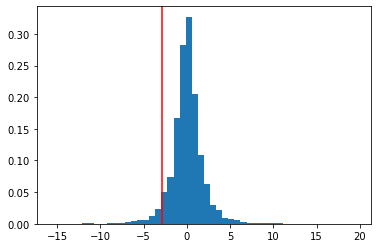

In [108]:
# Sort the returns for plotting
sorted_rets = StockReturns_perc.sort_values(ascending = True)

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, bins = 50)

# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

In [103]:
# Historical expected shortfall (CVaR)
# Historical CVaR 95
cvar_95 = StockReturns_perc[StockReturns_perc <= var_95].mean()
cvar_95

-4.48951512773387

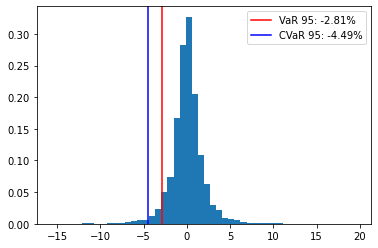

In [109]:
# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each return quantile
plt.hist(sorted_rets, density = True, bins = 50)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.legend()
plt.show()


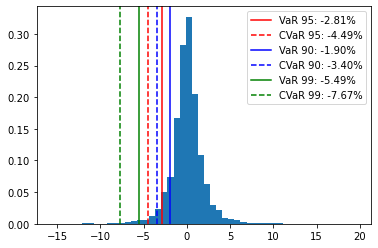

In [113]:
# VaR quantiles often used are 90%, 95%, and 99%, corresponding to the worst 10%, 5%, and 1% of cases respectively. 
# These same quantiles are also often used for CVaR. Note that CVaR will always be a more extreme estimate when 
# compared with VaR for the same quantile.
# Historical VaR(90) quantiles
var_90 = np.percentile(StockReturns_perc, 10)
var_99 = np.percentile(StockReturns_perc, 1)

# Historical CVaR(90) quantiles
cvar_90 = StockReturns_perc[StockReturns_perc <= var_90].mean()
cvar_99 = StockReturns_perc[StockReturns_perc <= var_99].mean()

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each return quantile
plt.hist(sorted_rets, density = True, bins = 50)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='r', linestyle='--', label='CVaR 95: {0:.2f}%'.format(cvar_95))

plt.axvline(x=var_90, color="b", linestyle="-", label='VaR 90: {0:.2f}%'.format(var_90))
plt.axvline(x=cvar_90, color='b', linestyle='--', label='CVaR 90: {0:.2f}%'.format(cvar_90))

plt.axvline(x=var_99, color="g", linestyle="-", label='VaR 99: {0:.2f}%'.format(var_99))
plt.axvline(x=cvar_99, color='g', linestyle='--', label='CVaR 99: {0:.2f}%'.format(cvar_99))

plt.legend()
plt.show()


In [116]:
# Parametric VaR
# Value at Risk can also be computed parametrically using a method known as variance/co-variance VaR.
# This method allows you to simulate a range of possibilities based on historical return distribution properties rather
# than actual return values. in fact in the previous method (historical VaR) you use actual returns to calculated VaR, but
# in the parametric VaR you use those actual histurical returns to estimate the mu and vatiance of the distribution and
# assuming normal distribution you calculate the VaR, instead of actual returns you use the distribution to get VaR.

# Import norm from scipy.stats
from scipy.stats import norm

# this time we do not multiply our returns by 100
StockReturns_real = StockPrices['Adjusted'].pct_change()

# Estimate the average daily return
mu = np.mean(StockReturns_real)

# Estimate the daily volatility
vol = np.std(StockReturns_real)

# Set the VaR confidence level
confidence_level = 0.95

# Calculate Parametric VaR
var_95 = norm.ppf(1-confidence_level, mu, vol)
print('Mean: ', str(mu), '\nVolatility: ', str(vol), '\nVaR(95): ', str(var_95))

Mean:  0.0003777754643575769 
Volatility:  0.019341100408708328 
VaR(95):  -0.03143550369213892


In [118]:
# Random Walks and Monte Carlo Simulation
# just because the stock market movements seem random, does not mean that you cannot model the movements.-----------------
# Random or Stochastic movements are apparent throughout nature, from tidal waves and earthquakes to crime, particle physics
# and yes, of course the STOCK MARKET. you can use mathematics to predict the future abd simulate possible outcomes.
# of course there is always some degree of uncertainty to most of these examples, but the process is still incredibly useful.
# here we use thr normal distribution as a staritng point of our simulations. you can use historical data to calculate mu and
# and std like above. 
# Set the simulation parameters

mu = np.mean(StockReturns_real)
vol = np.std(StockReturns_real)
T = 252
S0 = 10

# Add one to the random returns: generate T numbers of random numbers with normal distribution with mean of mu and std of vol
rand_rets_plus_1 = np.random.normal(mu, vol, T) + 1
rand_rets_plus_1

array([1.00926246, 1.05443482, 1.0290442 , 0.97832067, 0.97922659,
       0.99398414, 0.97825998, 0.98411263, 0.98758078, 1.03450962,
       0.98292966, 1.04867526, 0.98584221, 0.99430148, 0.99003713,
       1.01078058, 1.00776845, 1.03091053, 0.99431015, 1.02683042,
       0.99710943, 1.00221469, 1.00102969, 0.95510547, 1.0120274 ,
       0.98601602, 0.9658767 , 1.01059132, 1.01537658, 1.02855117,
       1.0042596 , 1.0275734 , 0.9985157 , 0.99754112, 1.00460407,
       1.01374134, 0.96323038, 1.01687566, 1.0229328 , 0.97537832,
       0.98288055, 0.99678546, 1.02029972, 0.98917146, 0.96710302,
       0.98756686, 1.02413065, 0.99383655, 1.01322601, 1.00175582,
       0.97437901, 1.00415749, 0.99833629, 0.97422214, 1.03237826,
       0.99585245, 0.98162982, 0.95464046, 1.01686615, 1.01823785,
       1.01980214, 0.99896971, 1.03440368, 0.98335379, 0.9923052 ,
       0.98647301, 0.99089403, 0.98844107, 0.96344485, 0.99664824,
       0.99007627, 0.993736  , 0.98566669, 0.99185636, 0.99200

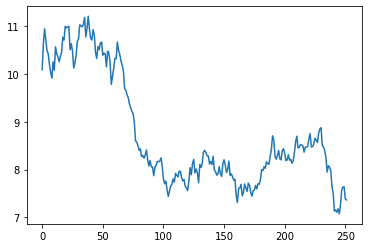

In [119]:
# Forecasted random walk
forecasted_values = S0 * (rand_rets_plus_1.cumprod())

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

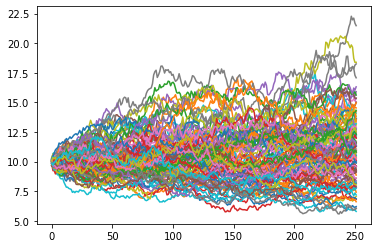

In [121]:
# the above was only one iteration of the monte carlo simulation, this process should be repeated mant times

# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets_plus_1 = np.random.normal(mu, vol, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets_plus_1).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

In [133]:
# in monte carlo simulation we need to record all the above random walks and aggregate them and then calculate VaR

# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)
sim_returns

[array([ 9.99448577e-03,  5.09355763e-03, -2.49497383e-02,  1.68533692e-02,
        -7.39291959e-03,  2.12819266e-03,  1.58834466e-02, -1.02645718e-02,
        -7.03822205e-03, -1.90975707e-02,  8.60993660e-03, -6.04486872e-03,
         1.57219753e-02,  1.40957388e-02,  2.24314973e-02, -3.47889513e-02,
        -3.03256523e-03, -3.82475587e-02, -3.47359981e-03,  3.50615726e-02,
        -2.56281032e-02, -1.68183116e-02,  2.67197455e-02,  1.07090738e-02,
         3.65950541e-02,  1.40371367e-02, -8.94500662e-03, -1.00466611e-02,
        -8.20138842e-03,  8.37419919e-03,  6.22033622e-03,  7.69877877e-03,
         2.40754361e-02,  1.62738952e-02, -2.06983070e-02, -7.27632369e-03,
         2.08372261e-02,  1.26341148e-02,  1.17731028e-02,  6.39260629e-03,
         2.94275869e-02,  1.40695837e-02, -5.28481760e-03,  1.87556235e-02,
        -3.02466684e-02, -3.60575774e-02,  1.22218637e-02, -5.70034518e-02,
        -3.65293511e-03, -9.56019070e-03,  3.09349746e-02,  9.73627047e-03,
         1.6

In [135]:
# Calculate the VaR(95)
var_95 = np.percentile(sim_returns, 5)
print("Parametric VaR(95): ", round(100*var_95, 2),"%")

Parametric VaR(95):  -3.17 %
